In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

%matplotlib inline
# NEED HISTOGRAMS

In [2]:
def load_img(filename):
    return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

In [3]:
def rgb_to_int(*, red, green, blue):
    rgb = red;
    rgb = (rgb << 8) + green
    rgb = (rgb << 8) + blue
    return rgb
    
def int_to_rgb(rgb):
    red = (rgb >> 16) & 0xFF
    green = (rgb >> 8) & 0xFF
    blue = rgb & 0xFF
    return red, green, blue
    
idx = rgb_to_int(red=34, green=45, blue=78)
r,g,b = int_to_rgb(idx)
print(idx)
print(r, g, b)

2239822
34 45 78


In [4]:
training = {'GNB': [], 'MNB':[], 'LR': []}
testing = {'GNB': [], 'MNB':[], 'LR': []}

In [5]:
paintings = [load_img(f"../PGMData/imgs/schilderij_{i}.jpg") for i in range(0, 2269)]
photos = [load_img(f"../PGMData/imgs/foto_{i}.jpg") for i in range(0, 2269)]
drawings = [load_img(f"../PGMData/imgs/tekening_{i}.jpg") for i in range(0, 2269)]
prints = [load_img(f"../PGMData/imgs/prent_{i}.jpg") for i in range(0, 2269)]
print(len(paintings), len(photos), len(drawings), len(prints))
print(paintings[0].shape)
print(photos[0].shape)
print(drawings[0].shape)
print(prints[0].shape)

2269 2269 2269 2269
(500, 364, 3)
(248, 500, 3)
(337, 500, 3)
(362, 500, 3)


In [ ]:
# For constant # of pixels
SIZE = 32
METHODS = [cv2.INTER_AREA, cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
INTER_METHOD = METHODS[4]
data_paintings = [cv2.resize(img, (SIZE, SIZE), interpolation=INTER_METHOD).reshape(-1) for img in paintings]
data_photos = [cv2.resize(img, (SIZE, SIZE), interpolation=INTER_METHOD).reshape(-1) for img in photos]
data_drawings = [cv2.resize(img, (SIZE, SIZE), interpolation=INTER_METHOD).reshape(-1) for img in drawings]
data_prints = [cv2.resize(img, (SIZE, SIZE), interpolation=INTER_METHOD).reshape(-1) for img in prints]

In [ ]:
# try concat RGB
# paintings2 = [cv2.calcHist([img],[0],None,[256],[0,256]).reshape(-1) for img in paintings]
# photos2 = [cv2.calcHist([img],[0],None,[256],[0,256]).reshape(-1) for img in photos]
# # concat all 3
# data_paintings = [np.concatenate([cv2.calcHist([img], [i], None, [256], [0,256]) for i in range(3)]).reshape(-1) for img in paintings]
# data_photos = [np.concatenate([cv2.calcHist([img], [i], None, [256], [0,256]) for i in range(3)]).reshape(-1) for img in photos]

# raw pixels
# data_paintings = [img.reshape(-1) for img in data_paintings]
# data_photos = [img.reshape(-1) for img in data_photos]


print(data_paintings[0].shape)
print(data_photos[0].shape)
print(data_drawings[0].shape)
print(data_prints[0].shape)

In [ ]:
plt.plot(data_paintings[100])
plt.plot(data_photos[100])
plt.plot(data_drawings[100])
plt.plot(data_prints[100])

In [ ]:
# Guassian NB

train = np.stack(tuple(data_paintings + data_photos + data_drawings + data_prints), axis=0)
test = [0 for _ in range(len(data_paintings))] + [1 for _ in range(len(data_photos))] + [2 for _ in range(len(data_drawings))] + [3 for _ in range(len(data_prints))]
print(train.shape)
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.1, random_state=42)
print(X_train.shape, len(y_train))
print(X_test.shape, len(y_test))

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
training['GNB'].append(GNB.score(X_train, y_train))
testing['GNB'].append(GNB.score(X_test, y_test))
print('Training:', training['GNB'][-1])
print('Test:', testing['GNB'][-1])

In [ ]:
plt.plot(GNB.theta_[0])
plt.plot(GNB.theta_[1])
plt.plot(GNB.theta_[2])
plt.plot(GNB.theta_[3])

In [ ]:
# print(GNB.sigma_[0])
# print(GNB.sigma_[1])
plt.figure(1)
plt.subplot(221)
plt.imshow(GNB.theta_[0].reshape(SIZE, SIZE, 3).astype(int))
plt.title('Paintings')
plt.grid(False)

plt.subplot(222)
plt.imshow(GNB.theta_[1].reshape(SIZE, SIZE, 3).astype(int))
plt.title('Photos')
plt.grid(False)

plt.subplot(223)
plt.imshow(GNB.theta_[2].reshape(SIZE, SIZE, 3).astype(int))
plt.title('Drawings')
plt.grid(False)

plt.subplot(224)
plt.imshow(GNB.theta_[3].reshape(SIZE, SIZE, 3).astype(int))
plt.title('Prints')
plt.grid(False)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

# plt.plot(GNB.theta_[1])
# plt.plot(GNB.theta_[2])
# plt.plot(GNB.theta_[3])
# print(GNB.theta_[0].reshape(SIZE, SIZE, 3).astype(int))

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
training['MNB'].append(MNB.score(X_train, y_train))
testing['MNB'].append(MNB.score(X_test, y_test))
print('Training:', training['MNB'][-1])
print('Test:', testing['MNB'][-1])

In [ ]:
plt.figure(1)
plt.subplot(221)
tmp = np.exp(MNB.feature_log_prob_[0])
tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
plt.imshow(tmp.astype(int))
plt.title('Paintings')
plt.grid(False)

plt.subplot(222)
tmp = np.exp(MNB.feature_log_prob_[1])
tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
plt.imshow(tmp.astype(int))
plt.title('Photos')
plt.grid(False)

plt.subplot(223)
tmp = np.exp(MNB.feature_log_prob_[2])
tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
plt.imshow(tmp.astype(int))
plt.title('Drawings')
plt.grid(False)

plt.subplot(224)
tmp = np.exp(MNB.feature_log_prob_[3])
tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
plt.imshow(tmp.astype(int))
plt.title('Prints')
plt.grid(False)

In [ ]:
LR = LogisticRegression(solver='lbfgs', max_iter=100, multi_class='auto', fit_intercept=False)
LR.fit(X_train, y_train)
training['LR'].append(LR.score(X_train, y_train))
testing['LR'].append(LR.score(X_test, y_test))
print('Training:', training['LR'][-1])
print('Test:', testing['LR'][-1])

In [ ]:
# plt.figure(1)
# plt.subplot(221)
# tmp = LR.coef_[0]
# tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
# plt.imshow(tmp.astype(int))
# plt.title('Paintings')
# plt.grid(False)

# plt.subplot(222)
# tmp = LR.coef_[1]
# tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
# plt.imshow(tmp.astype(int))
# plt.title('Photos')
# plt.grid(False)

# plt.subplot(223)
# tmp = LR.coef_[2]
# tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
# plt.imshow(tmp.astype(int))
# plt.title('Drawings')
# plt.grid(False)

# plt.subplot(224)
# tmp = LR.coef_[3]
# tmp = minmax_scale(tmp.reshape(1, -1), axis=1).reshape(SIZE, SIZE, 3)*255
# plt.imshow(tmp.astype(int))
# plt.title('Prints')
# plt.grid(False)
coef = LR.coef_.copy()
plt.figure(figsize=(50, 25))
# scale = np.abs(coef).max()
for i in range(4):
    l1_plot = plt.subplot(2, 5, i + 1)
    tmp_coef_i = coef[i].reshape(SIZE, SIZE, 3)
    tmp_coef_i = (tmp_coef_i - tmp_coef_i.min())
    tmp_coef_i = tmp_coef_i / tmp_coef_i.max()
    l1_plot.imshow(tmp_coef_i, interpolation='nearest',
                   cmap=plt.cm.RdBu)#, vmin=-coef.min(), vmax=coef.max())
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

In [ ]:
# tmp_coef_i

In [ ]:
print(training)

In [ ]:
print(testing)

In [ ]:
plt.scatter([0, 1, 2, 3, 4], training['GNB'])
plt.scatter([0, 1, 2, 3, 4], testing['GNB'])

ValueError: x and y must be the same size

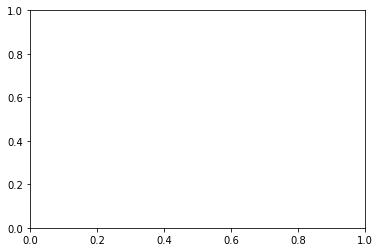

In [20]:
plt.scatter([128, 64, 32, 16, 8, 4, 2, 1], training['GNB'])
plt.scatter([128, 64, 32, 16, 8, 4, 2, 1], testing['GNB'])

In [ ]:
plt.scatter([128, 64, 32, 16, 8, 4, 2, 1], training['MNB'])
plt.scatter([128, 64, 32, 16, 8, 4, 2, 1], testing['MNB'])

In [ ]:
plt.scatter([128, 64, 32, 16, 8, 4, 2, 1], training['LR'])
plt.scatter([128, 64, 32, 16, 8, 4, 2, 1], testing['LR'])